# Лабораторная работа №3
Выполнила: *Девятерикова А.В.*  
группа: *М8О-401Б-18*  


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt

Напишем генерацию выборок для  
1) линейной зависимости  
2) нелинейной монотонной зависимости  
3) нелинейной немонотонной зависимости

In [2]:
def lin_mono(mu=0, sigma=1, n=100):
    x = np.random.normal(mu, sigma, n)
    z = np.random.normal(mu, sigma * 2, n)
    y = 0.6 * x + z + 2
    return x, y

def notlin_mono(mu=0, sigma=1, n=100):
    x = np.random.normal(mu, sigma, n)
    z = np.random.normal(mu, sigma * 2, n)
    y = 0.2 * x ** 3 + z
    return x, y

def notlin_notmono(mu=0, sigma=1, n=100):
    x = np.random.normal(mu, sigma, n)
    z = np.random.normal(mu, sigma * 2, n)
    y = 0.5 * np.sin(x) + z
    return x, y

Напишем функции для критериев
1) проверки на корреляцию  
2) Спирмена  
3) Хи-квадрат Пирсена

In [3]:
def corr_test(x, y, alpha = 0.05):
    n = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    # вычисляем выборочный коэф корреляции
    r = (1 / n * np.sum((x - x_mean) * (y - y_mean))) / (1 / n * np.sum((x - x_mean) ** 2) * 1 / n * np.sum((y - y_mean) ** 2)) ** 0.5
    t_value = n ** 0.5 * r
    p_value = np.min(np.array([2 * ss.norm.cdf(t_value), 2 - 2 * ss.norm.cdf(t_value)]), axis=0)
    return (p_value > 0.5 * alpha) and (p_value < (1 - 0.5 * alpha))

def Spearman(x, y, alpha = 0.05):
    n = len(x)
    x_rangs = ss.rankdata(x)
    y_rangs = ss.rankdata(y)
    r_spearman = 1 - 6 / (n ** 3 - n) * np.sum((x_rangs - y_rangs) ** 2)
    t_value = (n-1) ** 0.5 * r_spearman
    p_value = np.min(np.array([2 * ss.norm.cdf(t_value), 2 - 2 * ss.norm.cdf(t_value)]), axis=0)
    return (p_value > 0.5 * alpha) and (p_value < (1 - 0.5 * alpha))

In [4]:
def to_nominal(x, k):
    #x_sort = np.sort(x)
    x_in_scale = np.zeros(k)
    slices = np.linspace(np.min(x), np.max(x), k+1)
    for i in range(k):
        x_part = x[x >= slices[i]]
        x_count = (x_part <= slices[i+1]).sum()
        x_in_scale[i] = x_count
    return x_in_scale

def Pirson(x, y, alpha = 0.05):
    n = len(x)
    x_nom = to_nominal(x, 5)
    y_nom = to_nominal(y, 5)
    matrix = np.concatenate(([x_nom], [y_nom])) 
    chi2_value = 0
    for i in range(2):
        for j in range(len(x_nom)):
            chi2_value += (matrix[i][j] - (np.sum(matrix[i]) * np.sum(matrix[:,j]) / np.sum(matrix))) ** 2 \
            / (np.sum(matrix[i]) * np.sum(matrix[:,j]) / np.sum(matrix))
            
    # вычисляем p-value
    pirson_coeff = (chi2_value / (np.sum(matrix) + chi2_value)) ** 0.5
    kramer_coeff = (chi2_value / (np.sum(matrix) * np.min([(len(x_nom) - 1), 1]))) ** 0.5
    chuprov_coeff =  (chi2_value / (np.sum(matrix) * ((len(x_nom) - 1)) ** 0.5)) ** 0.5
    p_value = 1 - ss.chi2.cdf(chi2_value, (len(x_nom) - 1))
    return p_value > alpha
        

Проведём тест и построим столбчатые диаграммы 

In [5]:
def test(test, num=100, mu=0, sigma=1, n=100, alpha=0.05):
    lm_errors = 0
    nm_errors = 0
    nn_errors = 0
    for i in range(num):
        x1, y1 = lin_mono(mu, sigma, n)
        x2, y2 = notlin_mono(mu, sigma, n)
        x3, y3 = notlin_notmono(mu, sigma, n)
        
        lm_errors += int(test(x1, y1))
        nm_errors += int(test(x2, y2))
        nn_errors += int(test(x3, y3))
        
    return lm_errors / num, nm_errors / num, nn_errors / num

t1 = test(corr_test)
t2 = test(Spearman)
t3 = test(Pirson)
print(t1)
print(t2)
print(t3)

(0.27, 0.29, 0.76)
(0.35, 0.62, 0.71)
(0.56, 0.51, 0.62)


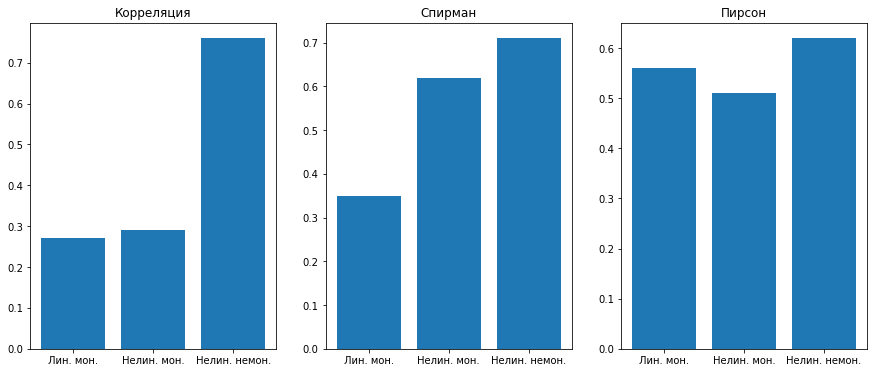

In [9]:
x = range(3)
names = ["Лин. мон.", "Нелин. мон.", "Нелин. немон."]

fig, ax = plt.subplots(1, 3)
fig.set_figwidth(15)
fig.set_figheight(6) 
ax[0].bar(x, t1, tick_label=names)
ax[1].bar(x, t2, tick_label=names)
ax[2].bar(x, t3, tick_label=names)
ax[0].set_title('Корреляция')
ax[1].set_title('Спирман')
ax[2].set_title('Пирсон')
plt.show()